# Центральное и одностороннее численное дифферинцирование

In [1]:
import matplotlib.pyplot as plt

Пробная функция:

In [2]:
def Example ( x ):
  return x**11

Функции односторонней, центральной и аналитической производных соответственно:

In [3]:
def NDerivative_Side ( f , x , dx ) :
  return ( f ( x + dx ) - f ( x ) ) / dx

def NDerivative_Centre ( f , x , dx ) :
  return ( f ( x + dx ) - f ( x - dx ) ) / (2 * dx)

def Derivative ( x ):
  return 11*x**10

Функция построения графика разности аналитической и численной производных. Число -160 выбрано в качестве границы интервала не случайно. Это необходимо, чтобы график в логарифмической шкале отображался до значения 10^-16, где разность производных становится порядка машинного эпсилон для float, а сравнение значений теряет всякий смысл.

In [20]:
def LogPlot ( x0, NDer ):
  
  dvals = [ 10 ** (k/10) for k in range ( -160, 0 ) ]
  
  if NDer == 'Side'   :
    fvals = [ NDerivative_Side ( Example , x0 , 10 ** (k/10) ) - Derivative ( x0 ) for k in range ( -160 , 0 ) ]
    
  if NDer == 'Centre' :
    fvals = [ NDerivative_Centre ( Example , x0 , 10 ** (k/10) ) - Derivative ( x0 ) for k in range ( -160 , 0 ) ]
  
  plt.loglog ( dvals , fvals , 'o--')
  plt.grid(True)
  plt.show()

В качестве x0 можно выбрать любую точку области определения пробной функции.

In [21]:
x0 = 3.0

График для одностороннего приближения:

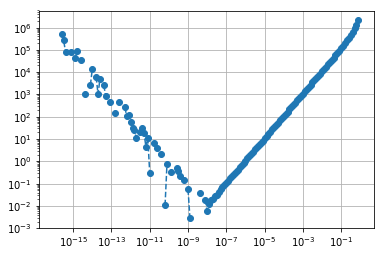

In [22]:
LogPlot ( x0 , 'Side' )

Для центрального:

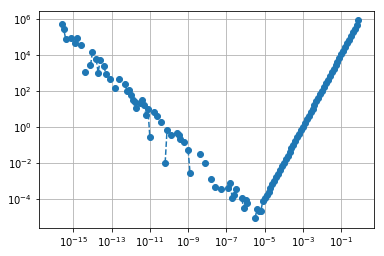

In [23]:
LogPlot ( x0 , 'Centre' )

Флуктуации в левой ветви графиков есть ничто иное, как результат неточного округления и накопления ошибки при малых значениях приращения аргумента. При возрастании приращения эти ошибки естественным образом устраняются. В остальном же легко заметить, что минимум функции разностей для центрального приближения лежит гораздо ниже минимума функции для одностороннего приближения. Это означает, что центральное приближение дает на несколько порядков более эффективную оценку производной, чем одностороннее, что и требовалось доказать.